In [1]:
import pandas
import datetime as datetime
time = datetime.datetime
import pytz 
import matplotlib.pyplot as plt

data = pandas.read_csv('reviews.csv', parse_dates=['Timestamp'])
data.head()

,Course Name,Timestamp,Rating,Comment
0,The Python Mega Course: Build 10 Real World Ap...,2021-04-02 06:25:52+00:00,4.0,NaN
1,The Python Mega Course: Build 10 Real World Ap...,2021-04-02 05:12:34+00:00,4.0,NaN
2,The Python Mega Course: Build 10 Real World Ap...,2021-04-02 05:11:03+00:00,4.0,NaN
3,The Python Mega Course: Build 10 Real World Ap...,2021-04-02 03:33:24+00:00,5.0,NaN
4,The Python Mega Course: Build 10 Real World Ap...,2021-04-02 03:31:49+00:00,4.5,NaN


## Average Ratings by Day

Aggregating data is better than completely raw data. It helps in turning the data into information.

In [2]:
# Groupby groups data based on identical values
# Since times are also present in the timestamp column, groupby won't work.
# Solution: extract the date out of a datetime
data['Day'] = data['Timestamp'].dt.date
# Then, give groupby the method you want to group by: 
# it will only be applied to columns that the method works on  
# Returns you new dataframe with day as index
day_average = data.groupby(['Day']).mean()

# You can get the index 
day_average.index

Index([2018-01-01, 2018-01-02, 2018-01-03, 2018-01-04, 2018-01-05, 2018-01-06,
       2018-01-07, 2018-01-08, 2018-01-09, 2018-01-10,
       ...
       2021-03-24, 2021-03-25, 2021-03-26, 2021-03-27, 2021-03-28, 2021-03-29,
       2021-03-30, 2021-03-31, 2021-04-01, 2021-04-02],
      dtype='object', name='Day', length=1188)

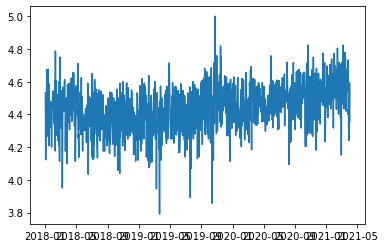

In [3]:
## Plotting it using matplotlib
plt.plot(day_average.index, day_average['Rating'])

#### Just a reminder that we can do this Bokeh

In [4]:
import bokeh.plotting as plotting
figure = plotting.figure

import bokeh.io as io
output_file = io.output_file
show = io.show

import bokeh.models as models

In [5]:
output_file('Line_from_csv.html')

fig1 = figure()

fig1.line(day_average.index, day_average['Rating'])

show(fig1)

#### Continued

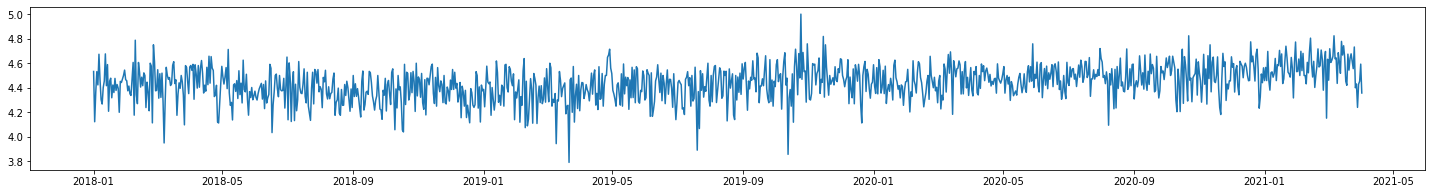

In [6]:
# You can fix the size of the graph
plt.figure(figsize=(25,3))
plt.plot(day_average.index, day_average['Rating'])

While this is good information, it can be better. We can 'downsample' the data. Ex: we can get weekly averages rather than daily averages.

## Average ratings by week

In [7]:
data['Week'] = data['Timestamp'].dt.strftime('%Y-%U')
week_average = data.groupby(['Week']).mean()
week_average

,Rating
Week,
2018-00,4.434564
2018-01,4.424933
2018-02,4.417702
2018-03,4.401024
2018-04,4.468085
...,...
2021-09,4.560096
2021-10,4.627315
2021-11,4.629121


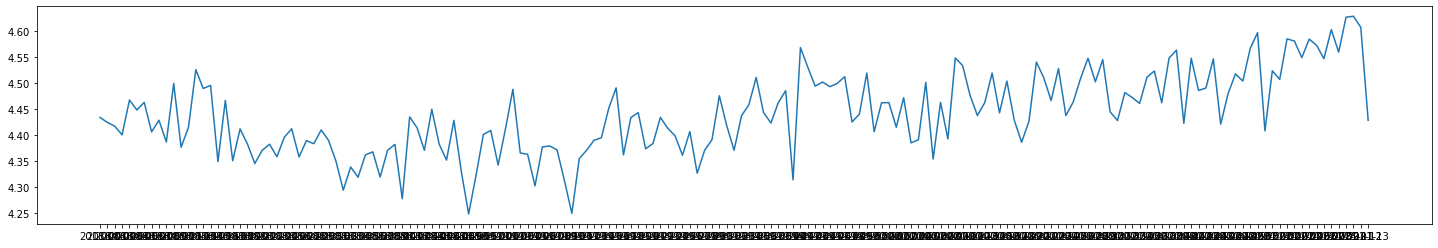

In [8]:
plt.figure(figsize=(25,4))
plt.plot(week_average.index, week_average['Rating'])

Downsampling even more

## Average ratings by month

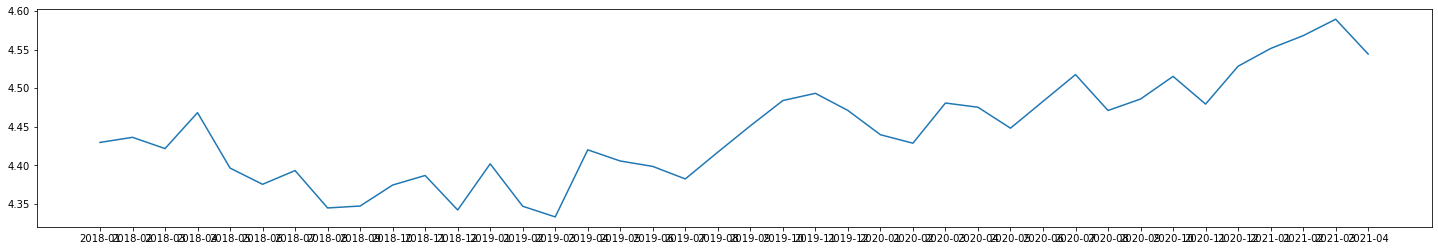

In [9]:
data['Month'] = data['Timestamp'].dt.strftime('%Y-%m')
month_average = data.groupby(['Month']).mean()

plt.figure(figsize=(25,4))
plt.plot(month_average.index, month_average['Rating'])

## Average rating by month by course 

In [10]:
data['Month'] = data['Timestamp'].dt.strftime('%Y-%m')
# Unstack helping in unstacking the index labels
month_average_crs = data.groupby(['Month', 'Course Name']).mean().unstack()
month_average_crs

Rating  \
Course Name 100 Python Exercises I: Evaluate and Improve Your Skills   
Month                                                                  
2018-01                                               4.353448         
2018-02                                               4.250000         
2018-03                                               4.500000         
2018-04                                               4.431034         
2018-05                                               4.358696         
2018-06                                               4.268293         
2018-07                                               4.589286         
2018-08                                               4.353659         
2018-09                                               4.238636         
2018-10                                               4.106061         
2018-11                                               4.212766         
2018-12                                               4.405172         
2019-01                                               4.048780         
2019-02                                               4.333333         
2019-03                                               4.269231         
2019-04                                               4.365854         
2019-05                                               4.486111         
2019-06                                               4.442308         
2019-07                                               4.414634         
2019-08                                               4.222222         
2019-09                                               4.531250         
2019-10                                               4.287500         
2019-11                                               4.512195         
2019-12                                               4.152778         
2020-01                                               4.277778         
2020-02                                               4.200000         
2020-03                                               4.240000         
2020-04                                               4.329268         
2020-05                                               4.340909         
2020-06                                               4.397059         
2020-07                                               4.250000         
2020-08                                               4.121622         
2020-09                                               4.307692         
2020-10                                               4.366667         
2020-11                                               4.461538         
2020-12                                               4.294118         
2021-01                                               4.283333         
2021-02                                               4.450000         
2021-03                                               4.190476         
2021-04                                               4.500000         

                                                                       \
Course Name 100 Python Exercises II: Evaluate and Improve Your Skills   
Month                                                                   
2018-01                                                    NaN          
2018-02                                                    NaN          
2018-03                                                    NaN          
2018-04                                                    NaN          
2018-05                                                    NaN          
2018-06                                                    NaN          
2018-07                                                    NaN          
2018-08                                                    NaN          
2018-09                                                    NaN          
2018-10                                                    NaN          
2018-11         

<AxesSubplot:xlabel='Month'>

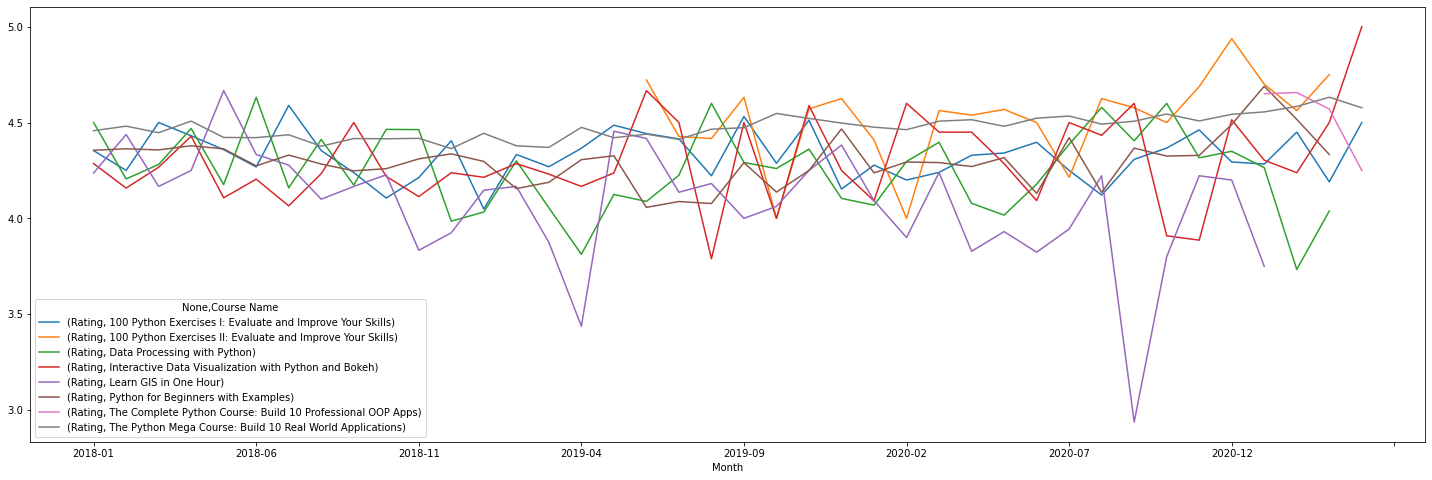

In [11]:
# This is the plot directly from the data frame
month_average_crs.plot(figsize=(25,8))

## Other types of graphs

#### Number of ratings by course

In [14]:
share = data.groupby(['Course Name'])['Rating'].count()

Course Name
100 Python Exercises I: Evaluate and Improve Your Skills       1593
100 Python Exercises II: Evaluate and Improve Your Skills       280
Data Processing with Python                                     868
Interactive Data Visualization with Python and Bokeh            767
Learn GIS in One Hour                                           499
Python for Beginners with Examples                             4821
The Complete Python Course: Build 10 Professional OOP Apps      470
The Python Mega Course: Build 10 Real World Applications      35702
Name: Rating, dtype: int64

([<matplotlib.patches.Wedge at 0x7feff0a21af0>,
 [Text(1.0932045021416132, 0.12208159770132226, '100 Python Exercises I: Evaluate and Improve Your Skills'),
  Text(1.0679539537181753, 0.26357987923534204, '100 Python Exercises II: Evaluate and Improve Your Skills'),
  Text(1.0434237552357248, 0.34823392570193146, 'Data Processing with Python'),
  Text(0.9969710234481678, 0.46481047579063145, 'Interactive Data Visualization with Python and Bokeh'),
  Text(0.9520514707070057, 0.5509972750609823, 'Learn GIS in One Hour'),
  Text(0.6871674297354248, 0.858953388438983, 'Python for Beginners with Examples'),
  Text(0.3307031314068022, 1.0491117380325774, 'The Complete Python Course: Build 10 Professional OOP Apps'),
  Text(-0.8762757995015485, -0.6649366309716455, 'The Python Mega Course: Build 10 Real World Applications')])

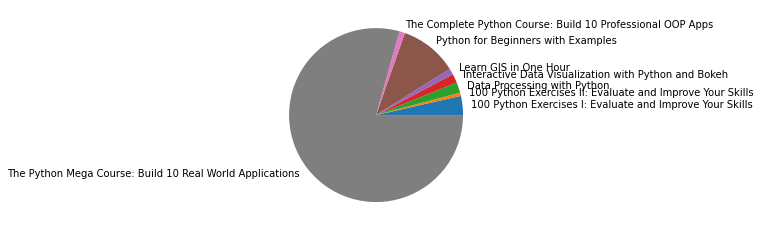

In [16]:
plt.pie(share, labels=share.index)

#### Conclusion: Matplotlib is not the friendliest library out there. It is best for data exploration. However, it's not really suitable for presenting your data to other.